In [1]:
# Загрузка библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

In [2]:
np.set_printoptions(suppress=True)

In [3]:
# module3_Admission_Predict_Ver1.1.csv

In [4]:
df = pd.read_csv('module3_Admission_Predict_Ver1.1.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [5]:
df.columns = ['Serial_No.', 'GRE_Score','TOEFL_Score', 
              'University_Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance_of_Admit']

1. GRE Scores ( out of 340 ) — баллы по GRE тестированию
2. TOEFL Scores ( out of 120 ) — баллы по экзамену TOEFL
3. University Rating ( out of 5 ) — рейтинг университета 
4. Statement of Purpose Strength ( out of 5 ) — весомость мотивационного письма
5. Letter of Recommendation Strength ( out of 5 ) — весомость рекомендационных писем
6. Undergraduate GPA ( out of 10 ) — средний балл в бакалавриате
7. Research Experience ( either 0 or 1 ) — наличие опыта исследовательской работы ( нет / есть)

In [6]:
df.corr()

,Serial_No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
Serial_No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE_Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL_Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University_Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance_of_Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [7]:
df.corr()['Chance_of_Admit'].sort_values()

Serial_No.           0.008505
Research             0.545871
LOR                  0.645365
SOP                  0.684137
University_Rating    0.690132
TOEFL_Score          0.792228
GRE_Score            0.810351
CGPA                 0.882413
Chance_of_Admit      1.000000
Name: Chance_of_Admit, dtype: float64

In [8]:
(df[df['Research']==0]).corr()

,Serial_No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
Serial_No.,1.000000,-0.165248,-0.185665,-0.093655,-0.199090,-0.018579,-0.138537,NaN,-0.002771
GRE_Score,-0.165248,1.000000,0.680668,0.384715,0.371424,0.365864,0.678476,NaN,0.603827
TOEFL_Score,-0.185665,0.680668,1.000000,0.495748,0.476563,0.470956,0.696774,NaN,0.622458
University_Rating,-0.093655,0.384715,0.495748,1.000000,0.607496,0.484262,0.516427,NaN,0.428580
SOP,-0.199090,0.371424,0.476563,0.607496,1.000000,0.618680,0.547098,NaN,0.470188
LOR,-0.018579,0.365864,0.470956,0.484262,0.618680,1.000000,0.562517,NaN,0.542528
CGPA,-0.138537,0.678476,0.696774,0.516427,0.547098,0.562517,1.000000,NaN,0.752714
Research,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chance_of_Admit,-0.002771,0.603827,0.622458,0.428580,0.470188,0.542528,0.752714,NaN,1.000000


In [9]:
(df[df['Research']==1]).corr()

,Serial_No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
Serial_No.,1.000000,-0.094895,-0.140706,-0.058624,-0.109004,0.010475,-0.049214,NaN,0.024458
GRE_Score,-0.094895,1.000000,0.824170,0.614739,0.613318,0.443374,0.806720,NaN,0.802439
TOEFL_Score,-0.140706,0.824170,1.000000,0.602445,0.629436,0.436199,0.784173,NaN,0.787180
University_Rating,-0.058624,0.614739,0.602445,1.000000,0.723126,0.573881,0.692237,NaN,0.713094
SOP,-0.109004,0.613318,0.629436,0.723126,1.000000,0.591858,0.717750,NaN,0.708238
LOR,0.010475,0.443374,0.436199,0.573881,0.591858,1.000000,0.564794,NaN,0.588558
CGPA,-0.049214,0.806720,0.784173,0.692237,0.717750,0.564794,1.000000,NaN,0.892489
Research,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chance_of_Admit,0.024458,0.802439,0.787180,0.713094,0.708238,0.588558,0.892489,NaN,1.000000


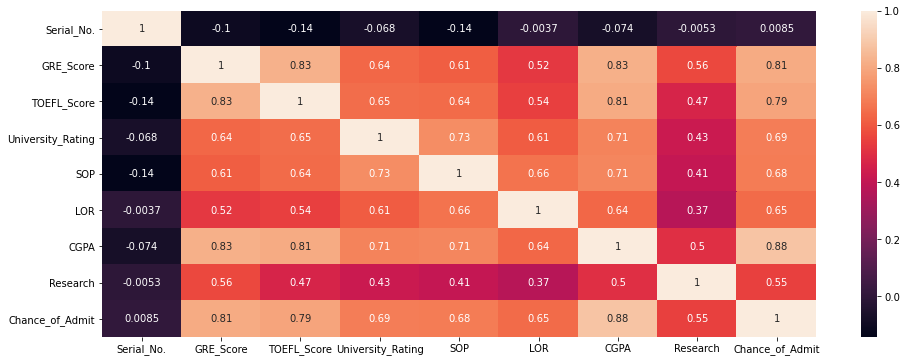

In [10]:
# представим корреляционную матрицу в виде "тепловой карты" с помощью функции heatmap из библиотеки seaborn
plt.figure(figsize=(16,6)) # размер графика
sns.heatmap(data=(df.corr()), annot=True)

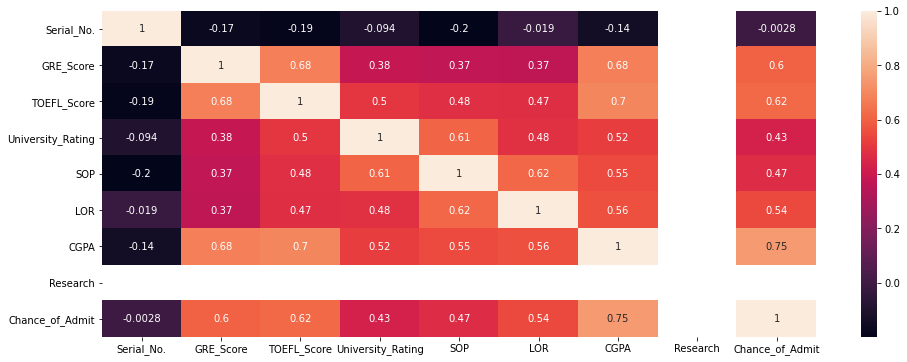

In [11]:
plt.figure(figsize=(16,6))
sns.heatmap(data=((df[df['Research']==0]).corr()), annot=True)

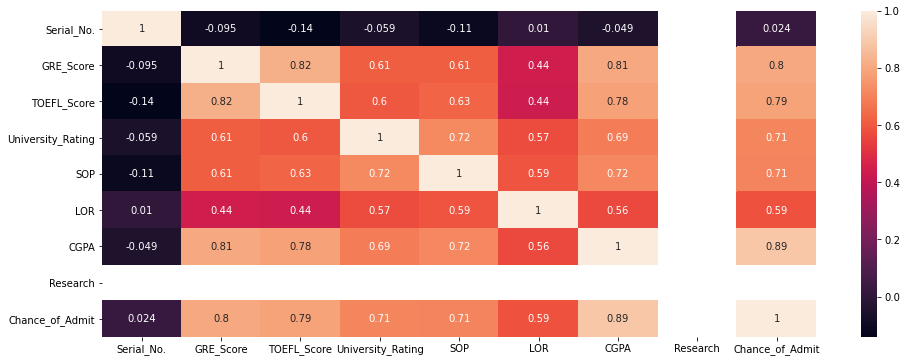

In [12]:
plt.figure(figsize=(16,6))
sns.heatmap(data=((df[df['Research']==1]).corr()), annot=True)

In [13]:
df[df['Research']==0]

,Serial_No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
4,5,314,103,2,2.0,3.0,8.21,0,0.65
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45
15,16,314,105,3,3.5,2.5,8.30,0,0.54
...,...,...,...,...,...,...,...,...,...
487,488,327,115,4,3.5,4.0,9.14,0,0.79
489,490,302,110,3,4.0,4.5,8.50,0,0.65
491,492,297,99,4,3.0,3.5,7.81,0,0.54
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [14]:
data = df[df['Research']==0][['TOEFL_Score', 'CGPA']]
data

,TOEFL_Score,CGPA
4,103,8.21
7,101,7.90
8,102,8.00
9,108,8.60
15,105,8.30
...,...,...
487,115,9.14
489,110,8.50
491,99,7.81
498,103,8.43


In [15]:
TOEFL = data['TOEFL_Score']
CGPA = data['CGPA']
A= np.column_stack((np.ones(220), TOEFL, CGPA))
A

array([[  1.  , 103.  ,   8.21],
       [  1.  , 101.  ,   7.9 ],
       [  1.  , 102.  ,   8.  ],
       [  1.  , 108.  ,   8.6 ],
       [  1.  , 105.  ,   8.3 ],
       [  1.  , 107.  ,   8.7 ],
       [  1.  , 110.  ,   8.8 ],
       [  1.  , 102.  ,   8.5 ],
       [  1.  , 114.  ,   8.4 ],
       [  1.  , 109.  ,   8.8 ],
       [  1.  ,  93.  ,   7.2 ],
       [  1.  ,  99.  ,   7.3 ],
       [  1.  , 106.  ,   8.4 ],
       [  1.  , 105.  ,   7.8 ],
       [  1.  , 105.  ,   7.5 ],
       [  1.  , 108.  ,   7.7 ],
       [  1.  , 117.  ,   9.1 ],
       [  1.  , 119.  ,   9.7 ],
       [  1.  , 110.  ,   8.  ],
       [  1.  , 103.  ,   7.7 ],
       [  1.  , 102.  ,   7.4 ],
       [  1.  ,  99.  ,   7.6 ],
       [  1.  , 104.  ,   8.3 ],
       [  1.  , 100.  ,   8.1 ],
       [  1.  , 101.  ,   8.2 ],
       [  1.  , 111.  ,   8.7 ],
       [  1.  , 112.  ,   8.92],
       [  1.  , 114.  ,   9.02],
       [  1.  , 106.  ,   8.9 ],
       [  1.  ,  99.  ,   8.22],
       [  

In [16]:
y = df[df['Research']==0][['Chance_of_Admit']]
y

,Chance_of_Admit
4,0.65
7,0.68
8,0.50
9,0.45
15,0.54
...,...
487,0.79
489,0.65
491,0.54
498,0.73


In [17]:
# вычислим OLS оценку для коэффициентов
w_hat=np.linalg.inv(A.T@A)@A.T@y
w_hat

,Chance_of_Admit
0,-1.044864
1,0.004427
2,0.148077


In [18]:
# прогноз
# новые данные:
TOEFL_new=107
CGPA_new=9.1
# прогноз шанса поступления
Chance_of_Admit_new=w_hat.iloc[0]+w_hat.iloc[1]*TOEFL_new+w_hat.iloc[2]*CGPA_new
Chance_of_Admit_new

Chance_of_Admit    0.776359
dtype: float64

In [19]:
new = np.array([1, 107, 9.1])
new@w_hat

Chance_of_Admit    0.776359
dtype: float64

Сделайте прогноз шансов поступления в университет для абитуриента с TOEFL Score=107, CGPA=9.1, используя модель, полученную в задаче 2.11.6 (!! используйте округленные значения признаков !!).

In [20]:
w_hat_2 = np.array([-1.045, 0.004, 0.148])

In [21]:
new@w_hat_2

0.7297999999999998

Стандартизация

In [22]:
meanTOEFL = data['TOEFL_Score'].mean()
meanCGPA  = data['CGPA'].mean()
mean_y = y.mean()
print('mean value of TOEFL:', meanTOEFL)
print('mean value of CGPA:', meanCGPA)
print('mean value of Chance_of_Admit:', mean_y)

mean value of TOEFL: 103.99090909090908
mean value of CGPA: 8.234727272727275
mean value of Chance_of_Admit: Chance_of_Admit    0.634909
dtype: float64


In [23]:
# Центрирование
TOEFL_c = data['TOEFL_Score'] - meanTOEFL
CGPA_c = data['CGPA'] - meanCGPA
y_c = y - mean_y
print('TOEFL до центрирования:\n', TOEFL.head(4))
print('TOEFL после центрирования:\n', TOEFL_c.head(4))

TOEFL до центрирования:
 4    103
7    101
8    102
9    108
Name: TOEFL_Score, dtype: int64
TOEFL после центрирования:
 4   -0.990909
7   -2.990909
8   -1.990909
9    4.009091
Name: TOEFL_Score, dtype: float64


In [24]:
TOEFL_c.mean()

5.2321783269607375e-15

In [25]:
# вычисляем длины векторов для нормирования
TOEFL_c_norm = np.linalg.norm(TOEFL_c)
CGPA_c_norm = np.linalg.norm(CGPA_c)
y_c_norm = np.linalg.norm(y_c)
print('norm of TOEFL:\n', TOEFL_c_norm)

norm of TOEFL:
 71.24592492333733


In [26]:
# Нормирование: делим каждый центрированный вектор на его длину
TOEFL_st = TOEFL_c/TOEFL_c_norm
CGPA_st = CGPA_c/CGPA_c_norm
y_st = y_c/y_c_norm
print('TOEFL до центрирования:\n', TOEFL.head(4))
print('TOEFL после центрирования:\n', TOEFL_c.head(4))
print('TOEFL после нормирования:\n', TOEFL_st.head(4))

TOEFL до центрирования:
 4    103
7    101
8    102
9    108
Name: TOEFL_Score, dtype: int64
TOEFL после центрирования:
 4   -0.990909
7   -2.990909
8   -1.990909
9    4.009091
Name: TOEFL_Score, dtype: float64
TOEFL после нормирования:
 4   -0.013908
7   -0.041980
8   -0.027944
9    0.056271
Name: TOEFL_Score, dtype: float64


In [27]:
TOEFL_st.mean()

8.743006318923108e-17

In [28]:
# Матрица центрированных признаков - БЕЗ константы!
A_st=np.column_stack(( TOEFL_st, CGPA_st,))
A_st

array([[-0.01390829, -0.00356568],
       [-0.04198007, -0.04826775],
       [-0.02794418, -0.03384772],
       [ 0.05627116,  0.05267241],
       [ 0.01416349,  0.00941234],
       [ 0.04223527,  0.06709243],
       [ 0.08434294,  0.08151245],
       [-0.02794418,  0.03825238],
       [ 0.1404865 ,  0.02383236],
       [ 0.07030705,  0.08151245],
       [-0.1542672 , -0.1492079 ],
       [-0.07005185, -0.13478788],
       [ 0.02819938,  0.02383236],
       [ 0.01416349, -0.06268777],
       [ 0.01416349, -0.10594783],
       [ 0.05627116, -0.07710779],
       [ 0.18259418,  0.12477251],
       [ 0.21066596,  0.21129264],
       [ 0.08434294, -0.03384772],
       [-0.01390829, -0.07710779],
       [-0.02794418, -0.12036785],
       [-0.07005185, -0.09152781],
       [ 0.0001276 ,  0.00941234],
       [-0.05601596, -0.0194277 ],
       [-0.04198007, -0.00500768],
       [ 0.09837883,  0.06709243],
       [ 0.11241472,  0.09881648],
       [ 0.1404865 ,  0.1132365 ],
       [ 0.02819938,

In [29]:
# OLS оценка коэффициентов центрированной регрессии
w_hat_st=np.linalg.inv(A_st.T@A_st)@A_st.T@y_st.values
w_hat_st

array([[0.19044768],
       [0.62001517]])

In [ ]:
#Выберите одну главную компоненту для дальнейшего анализа. Вычислите ее значения.

#Введите компоненты с округлением до 4 знака после запятой.

In [30]:
x1 = np.array([1,2,1,1]).T
x2 = np.array([70,130,65,60]).T
C = np.matrix("1, 0.992; 0.992, 1")
B = np.linalg.eig(C) 
# Нулевая компонента B[0] - вектор собственных чисел, а компонента B[1] - матрица, столбцами которой являются 
# собственные вектора, соответствующие данному числу.
B

(array([1.992, 0.008]),
 matrix([[ 0.70710678, -0.70710678],
         [ 0.70710678,  0.70710678]]))

In [ ]:
# Нужная айгенпара: 1.992; 0.70710678, 0.70710678 (1.992>0.008)

In [ ]:
#Неправильное решение:

#newfactor = B[1][0,0]*x1 + B[1][1,0]*x2
#newfactor

In [ ]:
#B[1][:,0]

In [ ]:
# Центрирование
#newfactor_c = newfactor - newfactor.mean()
#newfactor_c

In [ ]:
# вычисляем длины векторов для нормирования
#newfactor_norm = np.linalg.norm(newfactor_c)
#newfactor_norm

In [ ]:
# Нормирование: делим каждый центрированный вектор на его длину
#newfactor_st = newfactor_c/newfactor_norm
#newfactor_st

# Правильное решение:

In [45]:
#Центрирование и нормирование x1, x2:
def var_norm(x):
    x_c = x-x.mean()
    x_norm = np.linalg.norm(x_c)
    return x_c/x_norm

x1_st = var_norm(x1)
x2_st = var_norm(x2)

In [46]:
x1_st

array([-0.28867513,  0.8660254 , -0.28867513, -0.28867513])

In [47]:
x2_st

array([-0.19829369,  0.85927267, -0.28642422, -0.37455475])

In [48]:
newfactor = B[1][0,0]*x1_st + B[1][1,0]*x2_st
newfactor

array([-0.34433896,  1.21996996, -0.40665665, -0.46897435])

In [50]:
newfactor/np.linalg.norm(newfactor)

array([-0.24396044,  0.86433557, -0.28811186, -0.33226327])